## Robert Williams IS362 assignment 8

importing the data packages from the website to make a new data set

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 delim_whitespace=True, names=["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"])
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Some of the horsepower data is marked as missing with a ‘?’.replacing this ‘?’


In [100]:
df[df["Horsepower"] == "?"]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


Horsepower ? means they is no data. Changing ? to Float64 so the next data set can import numbers. 

In [2]:
df.replace("?", "NaN", inplace=True)
df["Horsepower"] = df["Horsepower"].astype(float)
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

Changning the origin values 1, 2, 3 inplace=True to Oirgin names 

In [4]:
df["Origin"].replace([1, 2, 3], ["USA", "Asia", "Europe"], inplace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


Creating a bar chart that shows the distribution for cylinders.

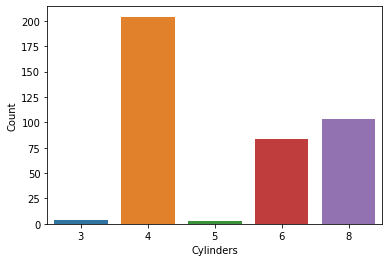

In [5]:
sns.barplot("Cylinders", "Count",
            data=df.groupby("Cylinders").size().reset_index(name="Count"))

Creating a scatterplot that shows the relationship between horsepower and weight.

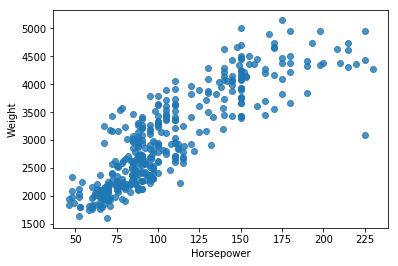

In [104]:
sns.regplot(x=df["Horsepower"], y=df["Weight"], fit_reg=False)

in this bar graph shows USA was the origin with the most cars in the data set

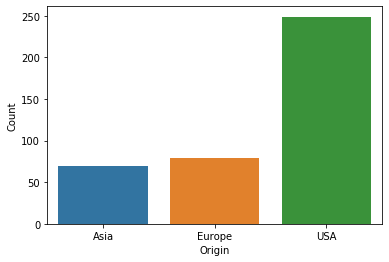

In [7]:
sns.barplot("Origin", "Count",
            data=df.groupby("Origin").size().reset_index(name="Count"))